# Maryland vehicle crashes

In [1]:
# importing libraries and file.

# for some basic operations
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
import seaborn as sb

In [2]:
# dataset download link: https://opendata.maryland.gov/widgets/65du-s3qu

#import the dataset.
df = pd.read_csv('Maryland_Statewide_Vehicle_Crashes.csv')
df

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2022,Q2,Dark Lights On,3.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.992210,-77.097021,POINT (-77.097020666667 38.9922095)
2,2020,Q4,NaN,6.02,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.323620,-76.503080,POINT (-76.503080116667 39.323620083333)
3,2022,Q1,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.411213,-76.628028,POINT (-76.628028425147 39.411213105087)
4,2022,Q2,Dark Lights On,3.00,Queen Anne's,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.974880,-76.281090,POINT (-76.28109 38.97488)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848799,2022,Q3,Daylight,1.00,Anne Arundel,2.0,NaN,0.0,Not Applicable,0.0,...,Miles,M,E,607.0,CO,NaN,OLD STAGE RD,39.158164,-76.628893,POINT (-76.62889296443 39.158163996637)
848800,2022,Q3,Daylight,1.00,Baltimore,3.0,NaN,0.0,NaN,88.0,...,Feet,F,N,1300.0,CO,NaN,REGESTER AVE,39.378626,-76.608568,POINT (-76.608567616667 39.378625966667)
848801,2022,Q3,Daylight,1.00,Baltimore,3.0,NaN,0.0,Not Applicable,0.0,...,Feet,F,W,4095.0,CO,NaN,EBENEZER RD,39.387539,-76.418305,POINT (-76.418304879322 39.387539278395)
848802,2022,Q3,Daylight,1.00,Anne Arundel,2.0,NaN,0.0,Non Intersection,1.0,...,Feet,F,N,12.0,SR,NaN,OCEANIC DR,39.019090,-76.403650,POINT (-76.40365 39.01909)


In [3]:
df.shape   #To find the count of rows and columns in the df

(848804, 55)

In [4]:
#column names of the dataset
df.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE',
       'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE',
       'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG',
       'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC',
       'LOGMILE_DIR_FLAG', 'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC',
       'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_NO',
       'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dty

In [5]:
df.describe()

,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,...,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,RTE_NO,LOG_MILE,DISTANCE,REFERENCE_NO,LATITUDE,LONGITUDE
count,848804.000000,848804.000000,848791.000000,0.0,635918.000000,764448.000000,848804.000000,764448.000000,645134.000000,764448.000000,...,848804.000000,8.488040e+05,848804.000000,848804.000000,678672.000000,760951.000000,745912.000000,671461.000000,848804.000000,848804.000000
mean,2018.292162,3.920314,12.758671,NaN,103.102466,2.654248,21.301865,2.650846,1.487601,1.779313,...,6.271491,2.018359e+07,3.946662,2.129694,969.321136,4.817931,63.561981,1282.173195,39.145036,-76.744918
std,2.222439,13.463945,7.863632,NaN,288.485994,9.991348,29.863128,9.131210,0.804584,8.547742,...,10.244158,2.220203e+04,8.571561,7.514640,1632.210201,9.263772,141.342771,1921.826956,0.310852,0.468617
min,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,2.015010e+07,0.000000,0.000000,-121.000000,0.000000,0.000000,-295.000000,37.000000,-79.996100
25%,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,6.010000,2.016111e+07,1.000000,0.000000,90.000000,0.230000,0.000000,59.000000,38.981895,-76.940341
50%,2018.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,1.000000,...,6.010000,2.018093e+07,1.000000,0.000000,258.000000,1.650000,0.500000,355.000000,39.225461,-76.709834
75%,2020.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,1.000000,...,6.010000,2.020092e+07,3.000000,1.000000,912.000000,6.460000,50.000000,1666.000000,39.346254,-76.574147
max,2022.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,99.000000,...,99.000000,2.022093e+07,99.000000,99.000000,9922.000000,5100.000000,1000.000000,9921.000000,39.994802,-75.000000


In [6]:
#checking the null values count for each column
df.isnull().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                34855
LIGHT_CODE                    0
COUNTY_DESC                  13
COUNTY_NO                    13
MUNI_DESC                848804
MUNI_CODE                212886
JUNCTION_DESC            114236
JUNCTION_CODE             84356
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            86726
SURF_COND_CODE            84356
LANE_CODE                203670
RD_COND_DESC              84356
RD_COND_CODE              84356
RD_DIV_DESC               88855
RD_DIV_CODE               84356
FIX_OBJ_DESC              45511
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             406780
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 459726
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE_FLAG                 0
AGENCY_C

In [7]:
#To find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   LIGHT_CODE             848804 non-null  float64
 4   COUNTY_DESC            848791 non-null  object 
 5   COUNTY_NO              848791 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              635918 non-null  float64
 8   JUNCTION_DESC          734568 non-null  object 
 9   JUNCTION_CODE          764448 non-null  float64
 10  COLLISION_TYPE_DESC    848804 non-null  object 
 11  COLLISION_TYPE_CODE    848804 non-null  int64  
 12  SURF_COND_DESC         762078 non-null  object 
 13  SURF_COND_CODE         764448 non-null  float64
 14  LANE_CODE              645134 non-nu

In [8]:
# dropping the columns which have more null values. these 3 columns have almost more than 90% nulls.
df.drop(['MUNI_DESC','RTE_SUFFIX','REFERENCE_SUFFIX'],axis='columns',inplace=True)

In [9]:
#checking the duplicates in df
dup = df[df.duplicated()]
dup

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,...,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION


In [10]:
#the MUNI_CODE which is numerical representation of MUNI_DESC.Hence dropping it from the df.
df.drop(['MUNI_CODE'],axis='columns',inplace=True)

In [11]:
df.shape

(848804, 51)

In [12]:
#dropping the columns which don't have predictive power 
df.drop(['AREA_CODE','MAINROAD_NAME','REFERENCE_ROAD_NAME','LOCATION',
                           'REPORT_NO','LOC_CODE','REFERENCE_TYPE_CODE','AGENCY_CODE','FEET_MILES_FLAG','SIGNAL_FLAG','LOGMILE_DIR_FLAG','ROUTE_TYPE_CODE'], axis = 'columns',inplace=True)

In [13]:
df.shape

(848804, 39)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   LIGHT_CODE             848804 non-null  float64
 4   COUNTY_DESC            848791 non-null  object 
 5   COUNTY_NO              848791 non-null  float64
 6   JUNCTION_DESC          734568 non-null  object 
 7   JUNCTION_CODE          764448 non-null  float64
 8   COLLISION_TYPE_DESC    848804 non-null  object 
 9   COLLISION_TYPE_CODE    848804 non-null  int64  
 10  SURF_COND_DESC         762078 non-null  object 
 11  SURF_COND_CODE         764448 non-null  float64
 12  LANE_CODE              645134 non-null  float64
 13  RD_COND_DESC           764448 non-null  object 
 14  RD_COND_CODE           764448 non-nu

In [15]:
#There are few columns that numerically correspond identically to other columns. So, i am removing those columns.
df.drop(['LIGHT_CODE','COUNTY_NO','JUNCTION_CODE','COLLISION_TYPE_CODE','SURF_COND_CODE','LANE_CODE','RD_COND_CODE','RD_DIV_CODE','FIX_OBJ_CODE','WEATHER_CODE','HARM_EVENT_CODE1','HARM_EVENT_CODE2'], 
                          axis = 'columns',
                         inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848804 entries, 0 to 848803
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   848804 non-null  int64  
 1   QUARTER                848804 non-null  object 
 2   LIGHT_DESC             813949 non-null  object 
 3   COUNTY_DESC            848791 non-null  object 
 4   JUNCTION_DESC          734568 non-null  object 
 5   COLLISION_TYPE_DESC    848804 non-null  object 
 6   SURF_COND_DESC         762078 non-null  object 
 7   RD_COND_DESC           764448 non-null  object 
 8   RD_DIV_DESC            759949 non-null  object 
 9   FIX_OBJ_DESC           803293 non-null  object 
 10  REPORT_TYPE            738071 non-null  object 
 11  WEATHER_DESC           442024 non-null  object 
 12  ACC_DATE               848804 non-null  int64  
 13  ACC_TIME               848804 non-null  object 
 14  SIGNAL_FLAG_DESC       848804 non-nu

In [17]:
# there are few nulls in the some of the columns I will handle this nulls when I create the pipelines for ml models. 

#  TARGET VARIABLE

In [18]:
#  Target variable is REPORT TYPE. Property Damage Crash, Injury Crash, and Fatal Crash are all various classes that are included in the target variable. Injury crash and fatal crash are nearly identical. 

In [19]:
#dropping all the null values in target variable 
df = df.dropna(subset = ['REPORT_TYPE'])

In [20]:
#replacing the class in target varaible 
df['REPORT_TYPE'] = df['REPORT_TYPE'].replace({'Fatal Crash':'Injury Crash'})

In [21]:
df.REPORT_TYPE.value_counts() # value count for target variable

Property Damage Crash    528441
Injury Crash             209630
Name: REPORT_TYPE, dtype: int64

<AxesSubplot:>

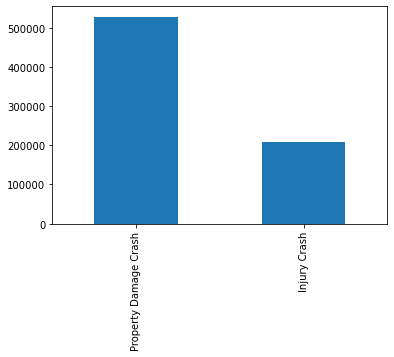

In [22]:
df['REPORT_TYPE'].value_counts().plot.bar() # bar plot for target variable

# Plots that show the distribution of the data

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'ACC_DATE'}>,
        <AxesSubplot:title={'center':'RTE_NO'}>],
       [<AxesSubplot:title={'center':'LOG_MILE'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>,
        <AxesSubplot:title={'center':'REFERENCE_NO'}>],
       [<AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>, <AxesSubplot:>]],
      dtype=object)

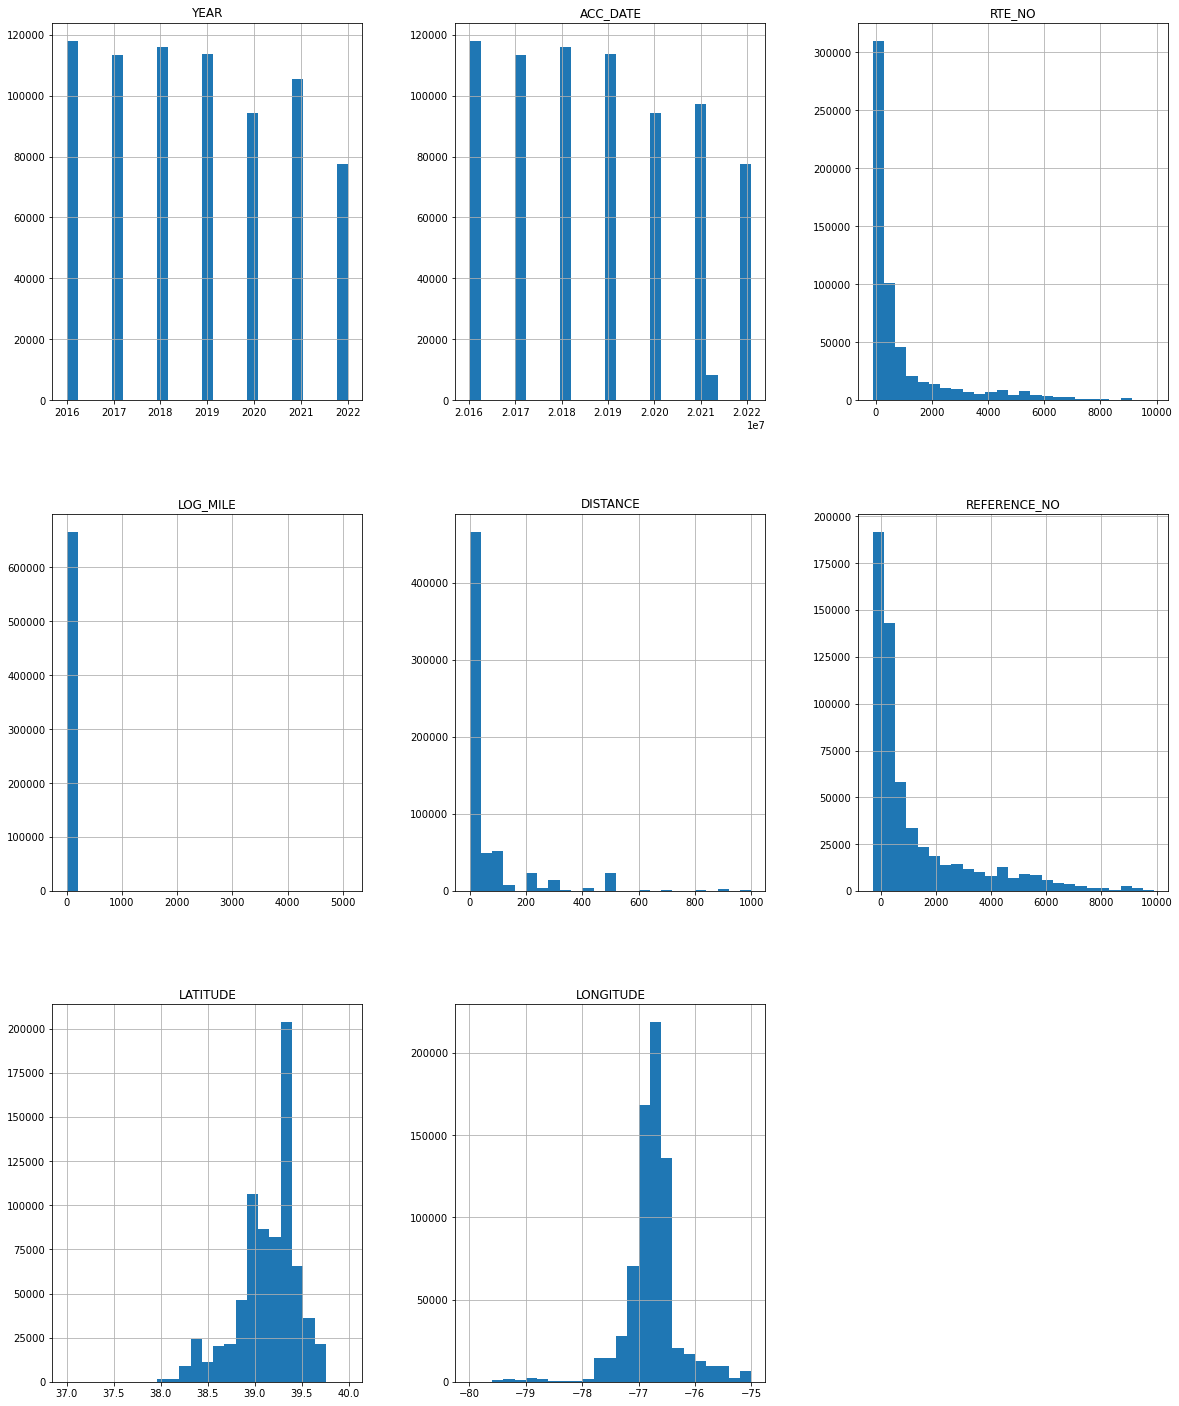

In [23]:
df.hist(bins = 25,figsize = (20,25))

# plotting bar graph for Countywide vehicle crashes

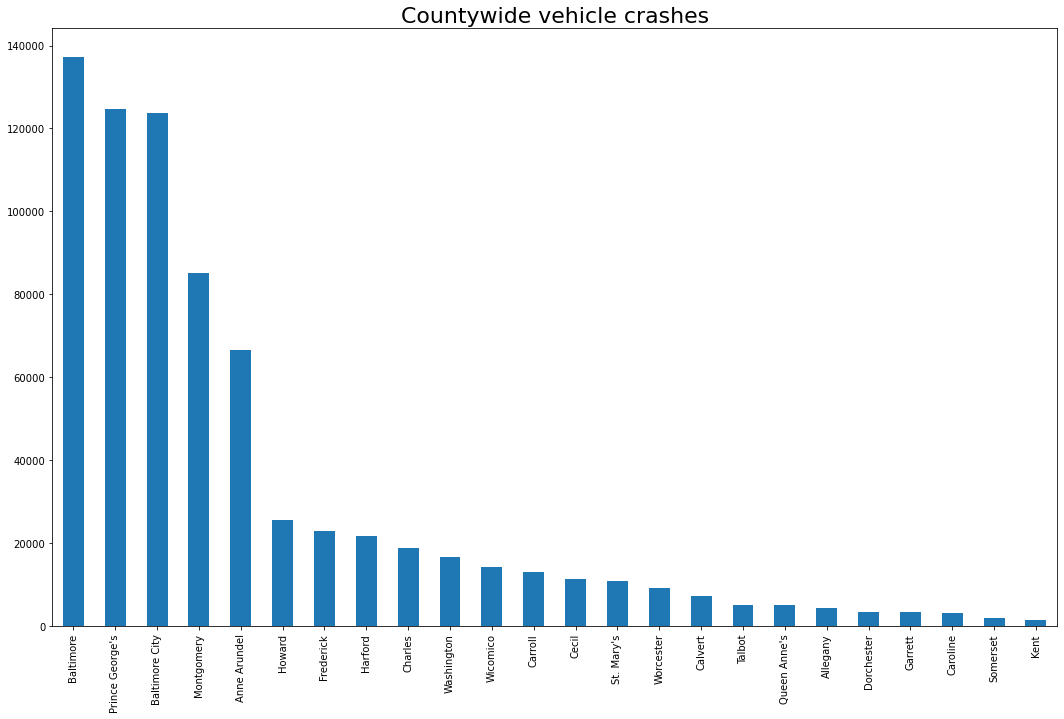

In [24]:
plt.rcParams['figure.figsize'] = (25, 10)
df['COUNTY_DESC'].value_counts().plot.bar( figsize = (18, 11))
plt.title('Countywide vehicle crashes', fontweight = 25, fontsize = 22)
plt.show()

In the above bar graph we can clearly see that in Baltimore county there are more than 120000 crashes.

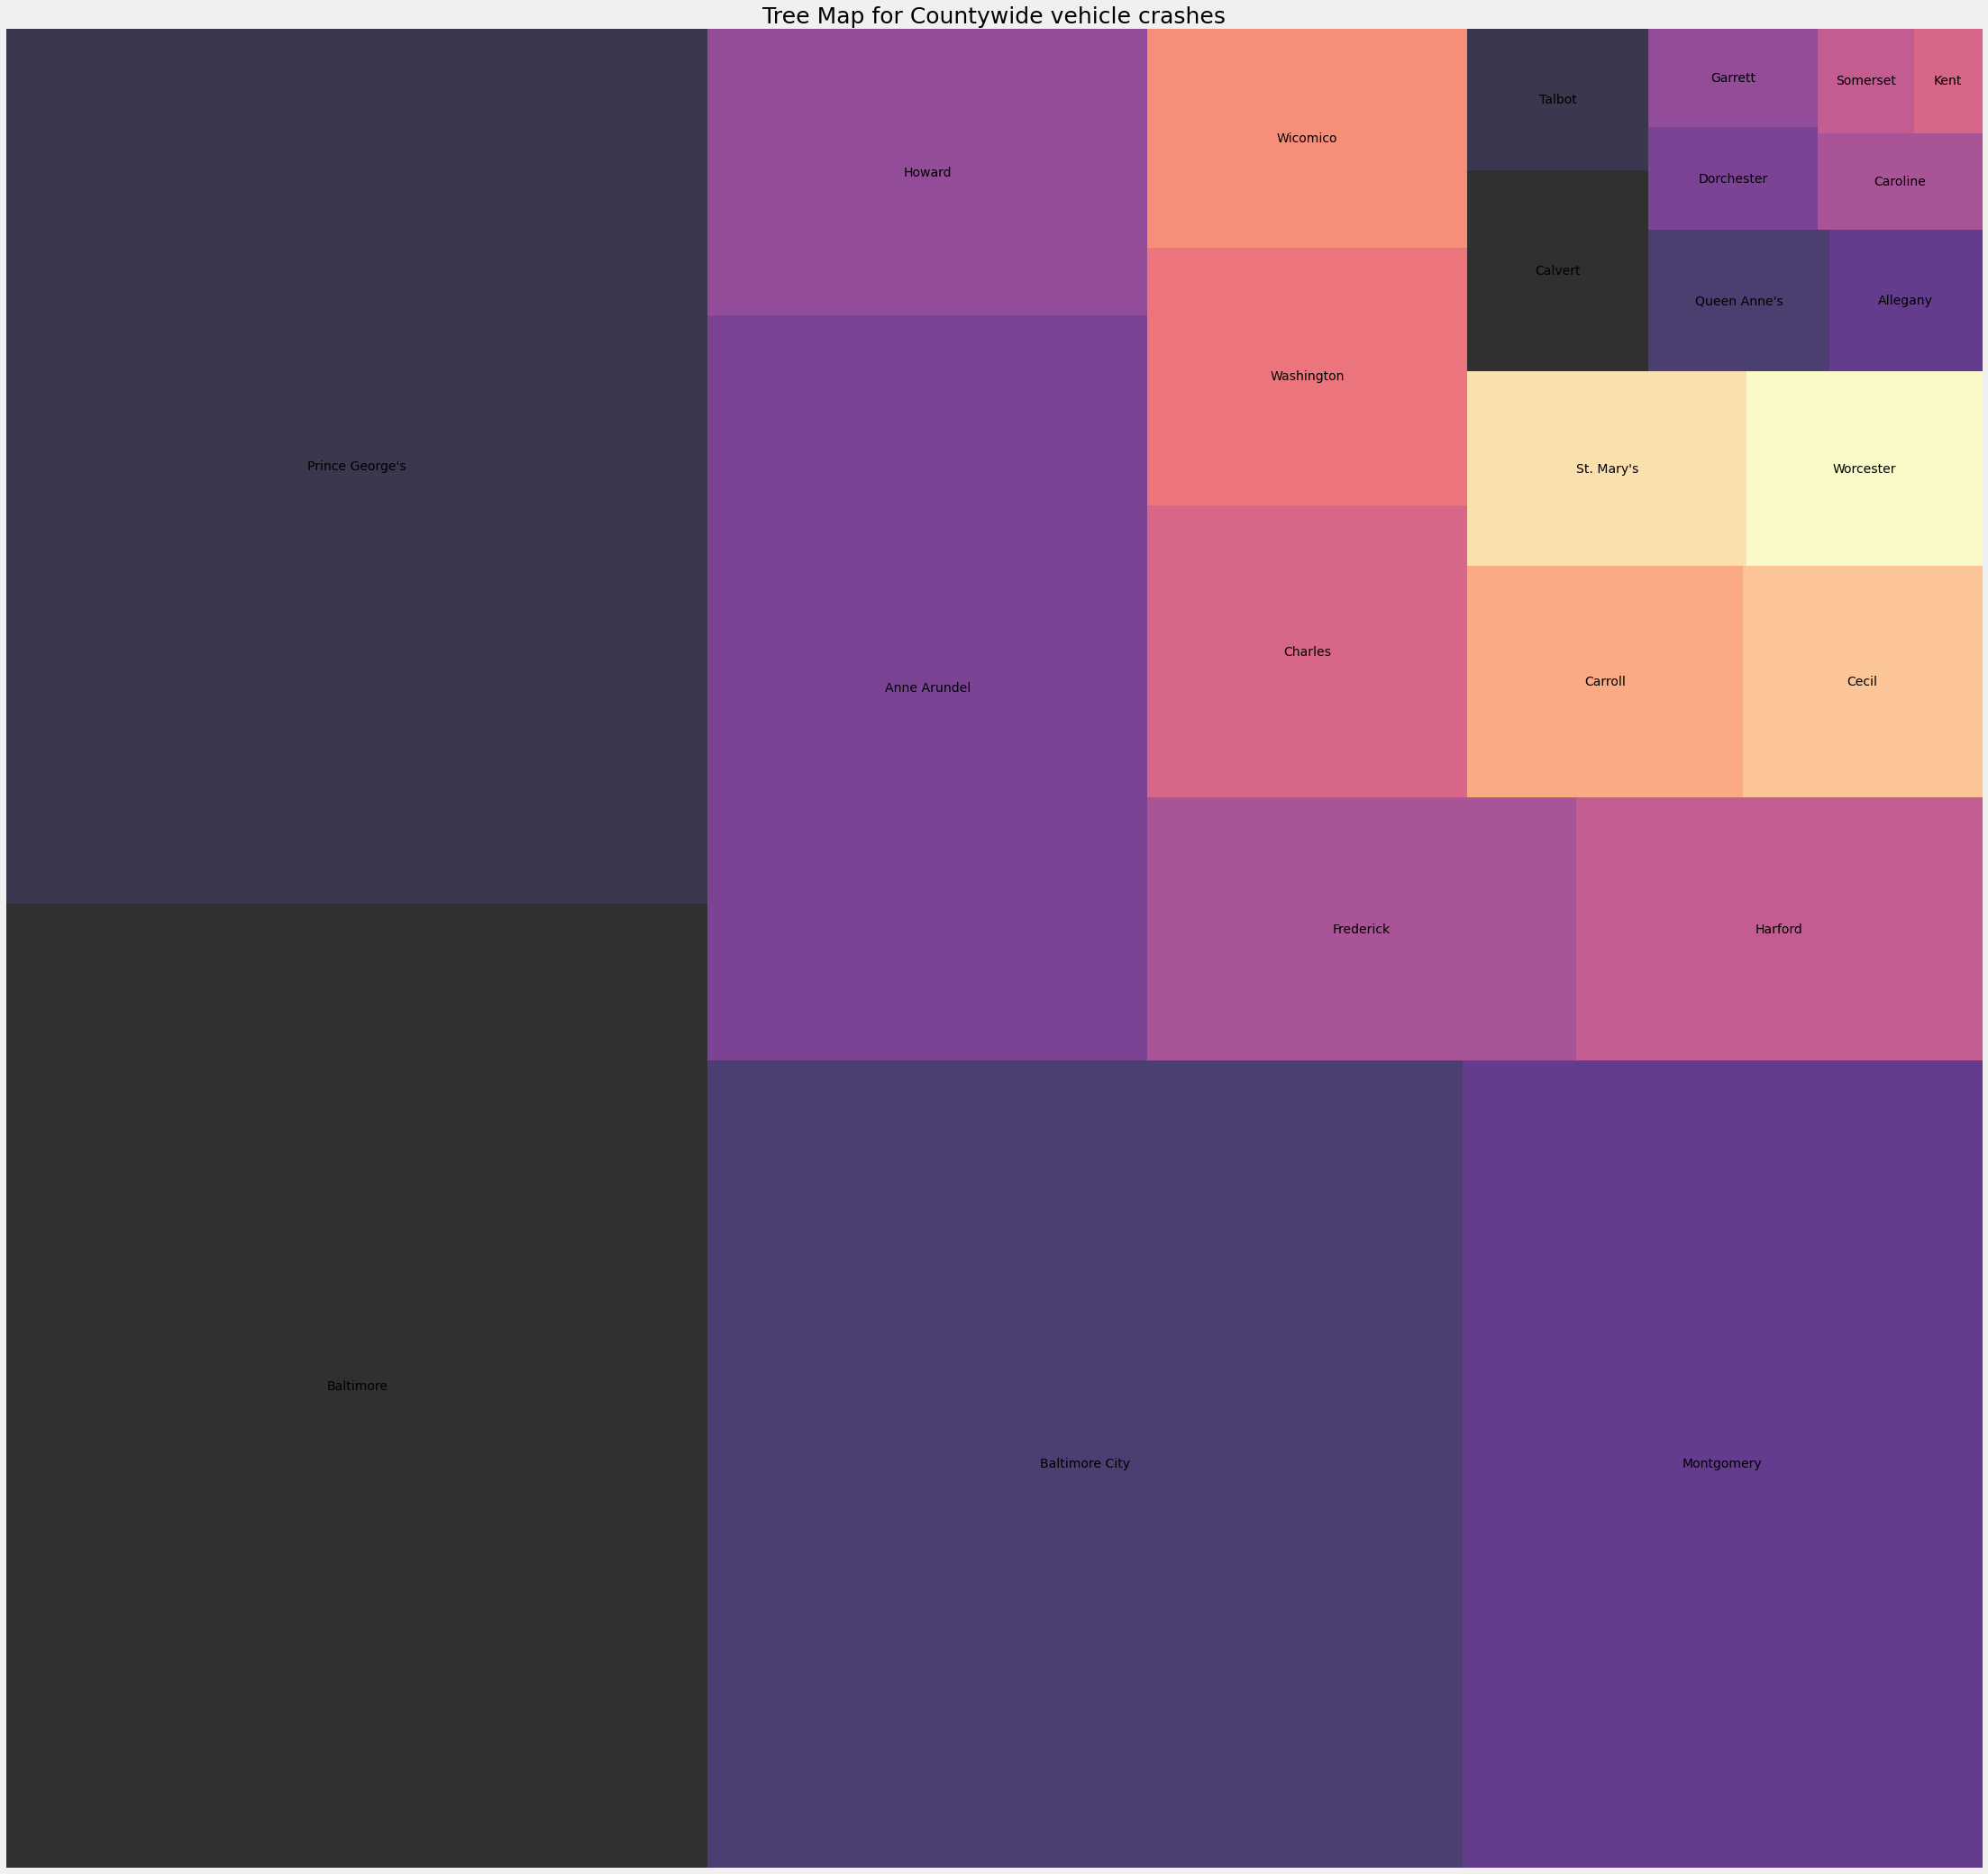

In [25]:
#Plotting a tree map
import numpy as np
!pip install squarify
import squarify
y = df['COUNTY_DESC'].value_counts()
    
plt.rcParams['figure.figsize'] = (35, 35)
plt.style.use('fivethirtyeight')
color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Countywide vehicle crashes', fontsize = 25)
plt.axis('off')
plt.show()

In the above tree map we can clearly see that batimore, Baltimore city, Montgomery, Prince George has more crashes in the past.

# Representation of correlation using heatmap

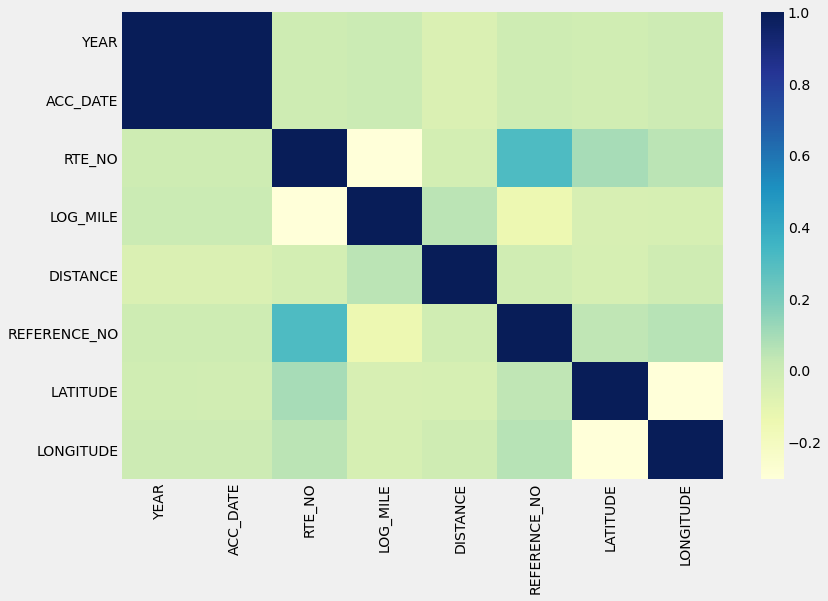

In [26]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="YlGnBu");

Text(0.5, 1.0, 'Counting the no. of accidents vs collision type')

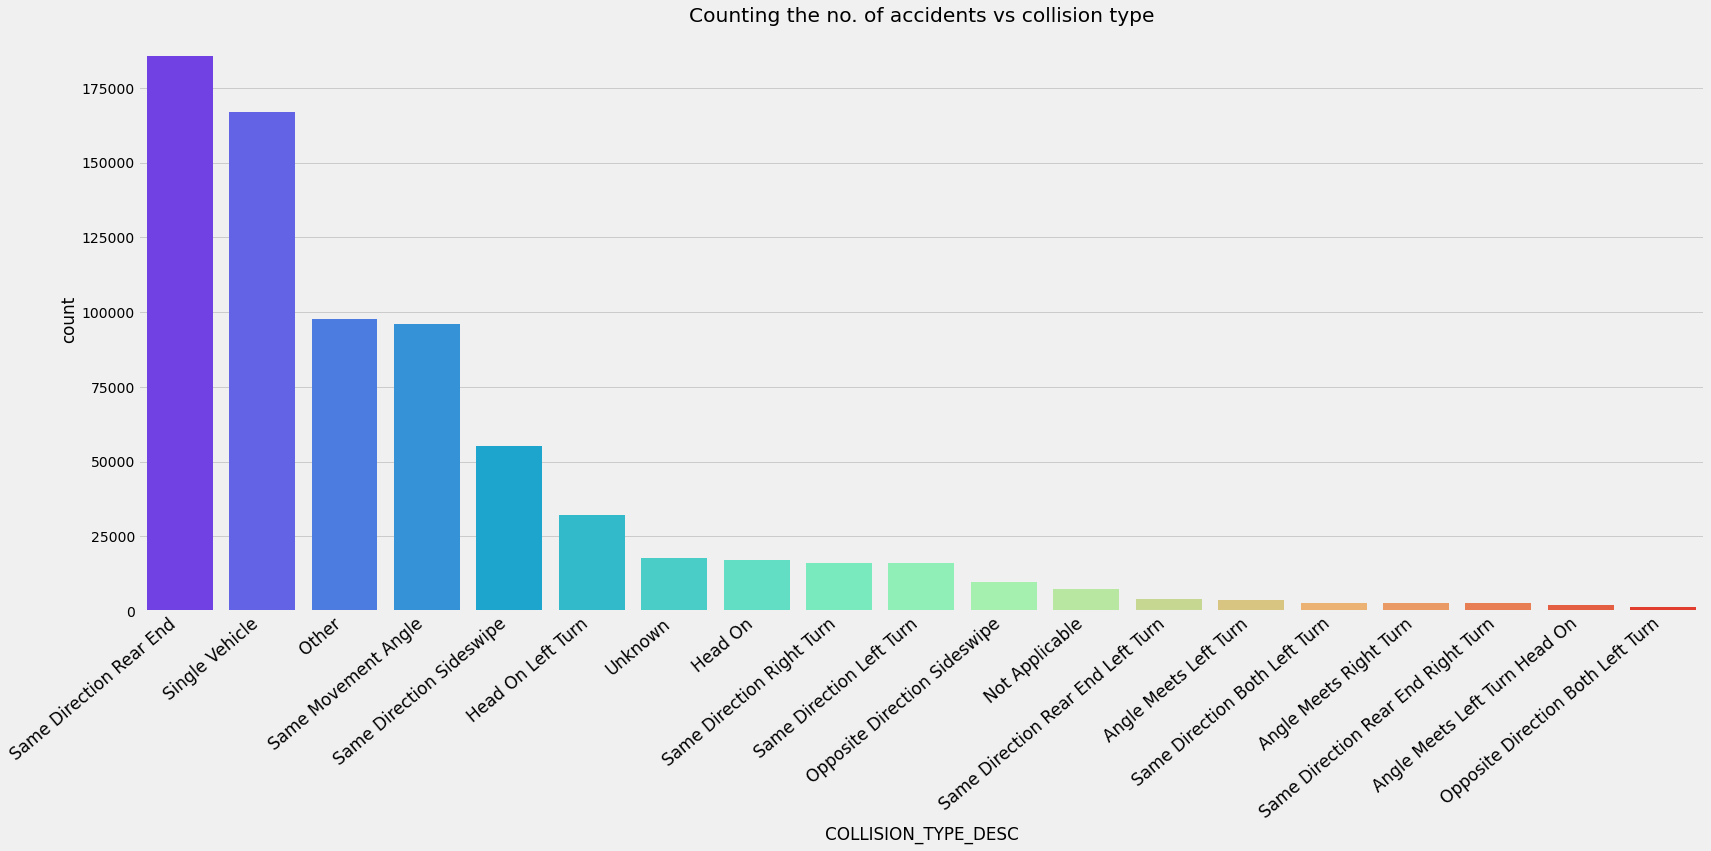

In [27]:
#no of accidents vs collision type
plt.rcParams['figure.figsize'] = (25, 10)
sb.countplot(x='COLLISION_TYPE_DESC', data = df, palette = 'rainbow', order = df['COLLISION_TYPE_DESC'].value_counts().index)

plt.xticks(
    rotation=40, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
    
)
plt.title('Counting the no. of accidents vs collision type')

In the above plot most of the crashes happened in the same direction rear end and it is very Rare for the crashes to happen opposite direction both taking a left turn.

Text(0.5, 1.0, 'Counting the no. of accidents vs year')

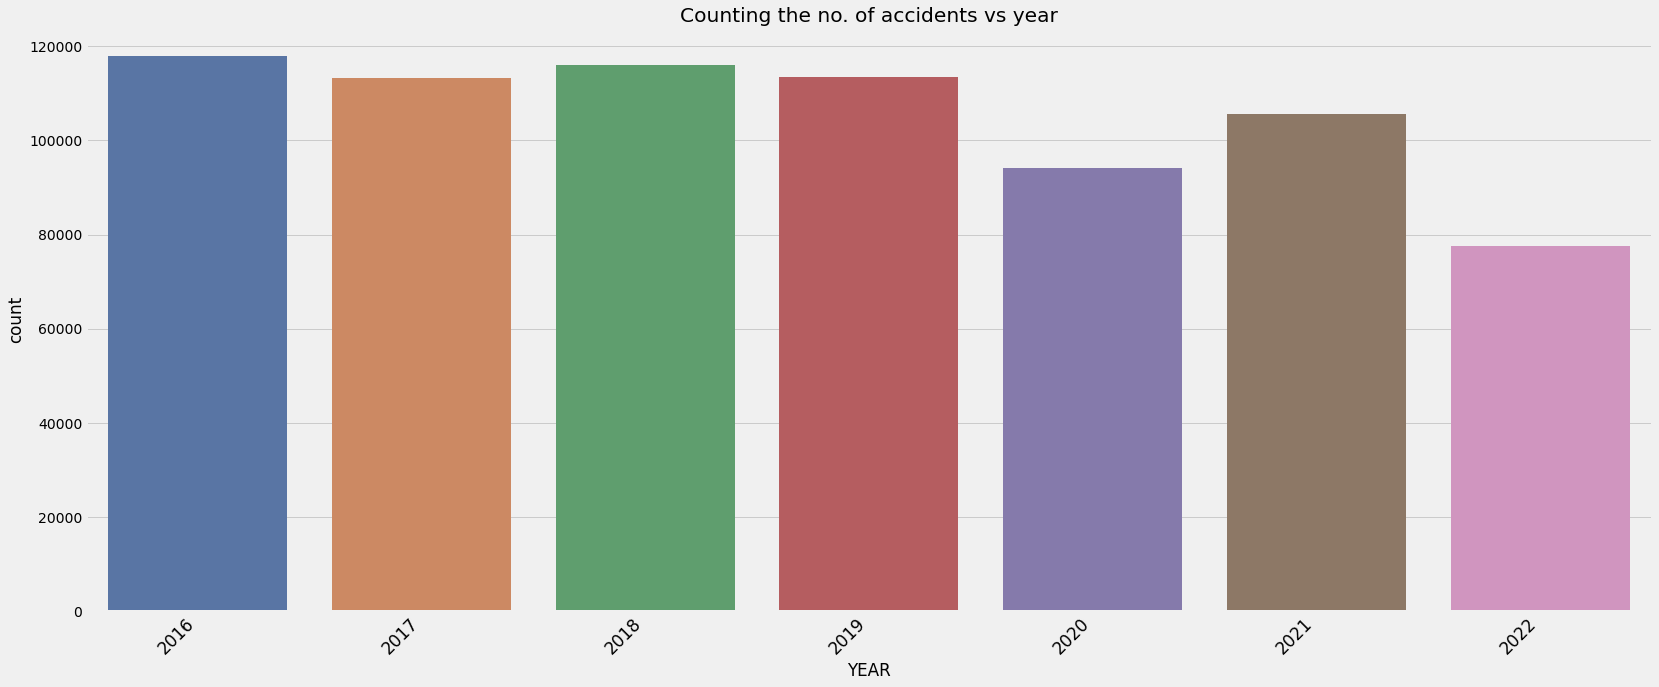

In [28]:
plt.rcParams['figure.figsize'] = (25, 10)
sb.countplot(x='YEAR', data = df, palette = 'deep')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Counting the no. of accidents vs year')

In [29]:
#Replacing the null values in junction column with unknown
df['JUNCTION_DESC']=df['JUNCTION_DESC'].fillna('unknown')

In [30]:
#No of accidents vs junction_type
junction_type = df['JUNCTION_DESC'].value_counts()
junction_type

Non Intersection          247882
Intersection              186868
Not Applicable            133503
unknown                    96672
Intersection Related       61477
Interchange Related         5227
Commercial Driveway         3075
Crossover Related           1329
Residential Driveway        1262
Alley                        695
Railway Grade Crossing        81
Name: JUNCTION_DESC, dtype: int64

Text(0.5, 1.0, 'Counting the no. of accidents vs junction type')

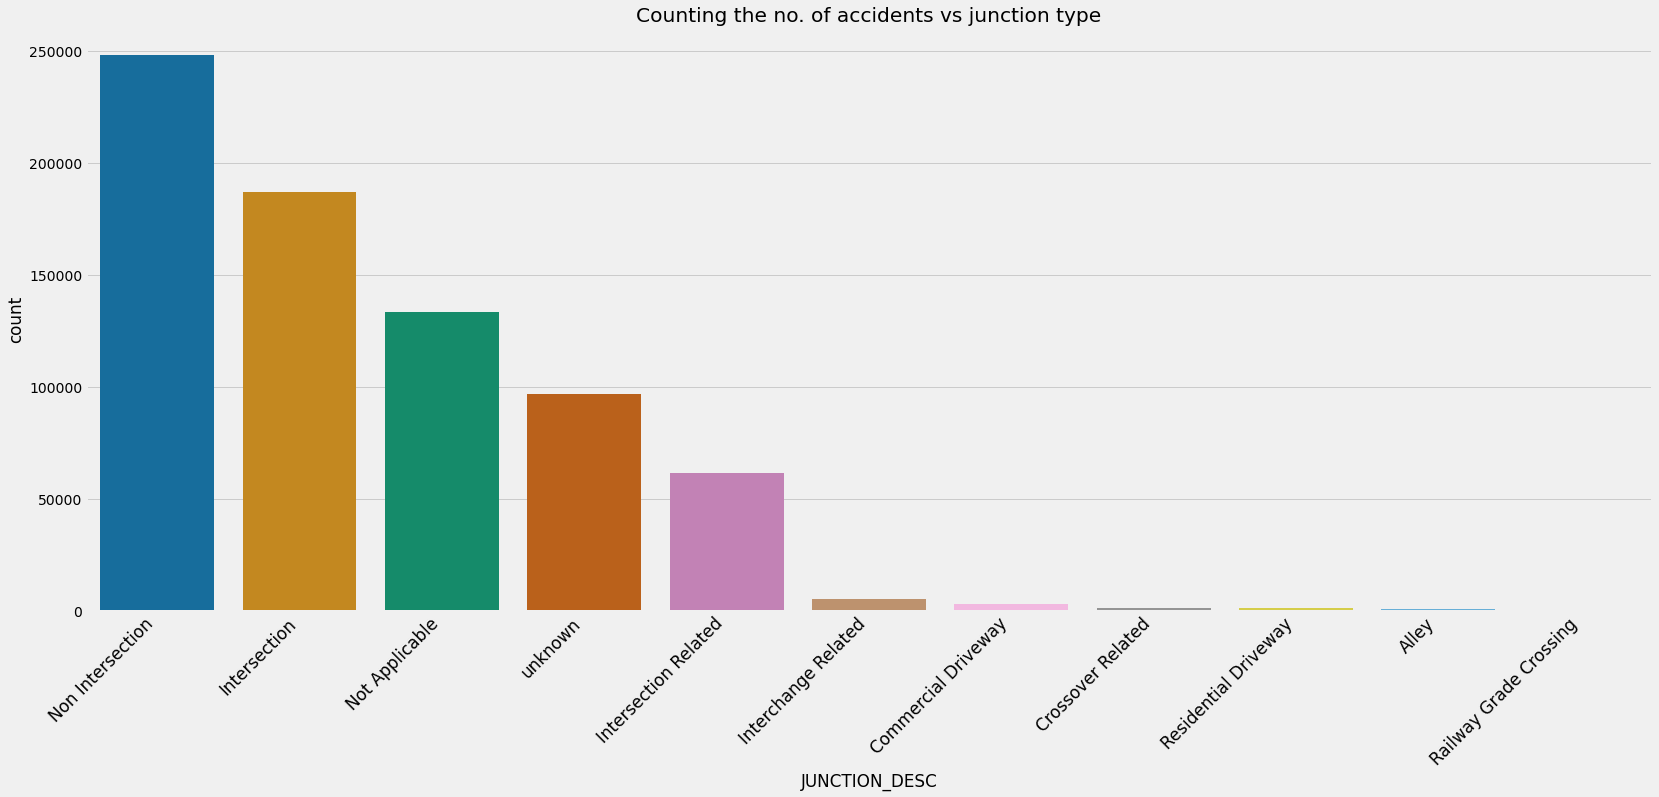

In [31]:
plt.rcParams['figure.figsize'] = (25, 10)
ax= sb.countplot(x='JUNCTION_DESC', data = df, palette = 'colorblind',order = df['JUNCTION_DESC'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('Counting the no. of accidents vs junction type')

Most of the accidents happened at non-intersections followed by intersections whereas less at Alleys and crossovers.

In [32]:
#value counts related to surface condition
df['SURF_COND_DESC']=df['SURF_COND_DESC'].fillna('Unknown')
surface_condition = df['SURF_COND_DESC'].value_counts()

Text(0.5, 1.0, 'The no. of accidents vs surface condition')

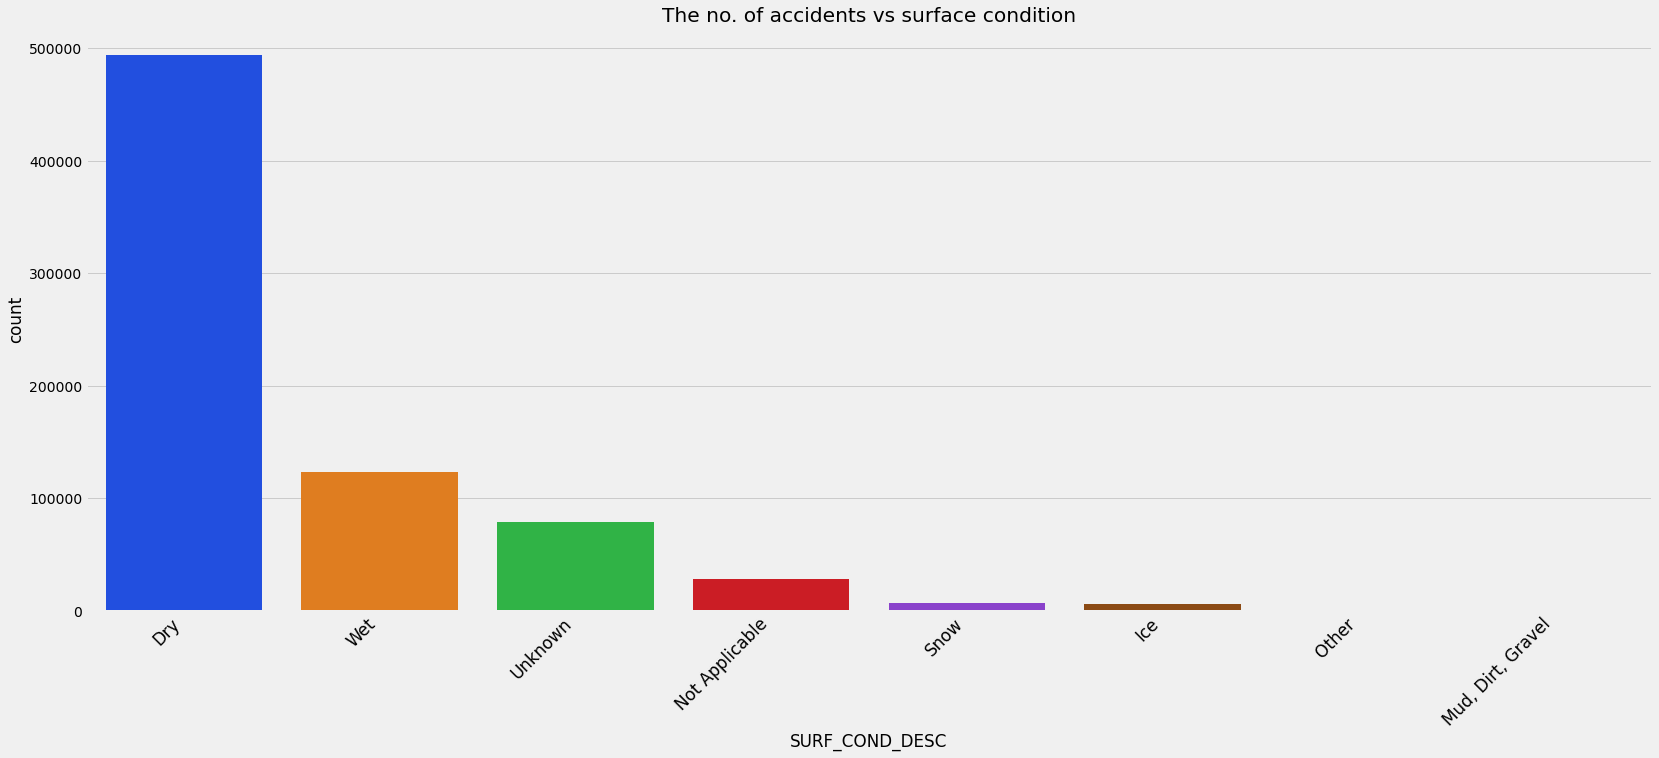

In [33]:
plt.rcParams['figure.figsize'] = (25, 10)
ax= sb.countplot(x='SURF_COND_DESC', data = df, palette = 'bright',order = df['SURF_COND_DESC'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('The no. of accidents vs surface condition')

From the above graph major accidents happened at dry areas whereas least happened on Ice and snow.

In [34]:
df['FIX_OBJ_DESC']=df['FIX_OBJ_DESC'].fillna('Unknown')
road_division_type = df['FIX_OBJ_DESC'].value_counts()
road_division_type

Not Applicable          540030
Guardrail or Barrier     40151
Unknown                  39999
Curb                     31847
Tree Shrubbery           20572
Other Pole               16899
Light Support Pole       11471
Embankment                9936
Sign Support Pole         9528
Fence                     8113
Building                  6843
Bridge or Overpass        1618
Construction Barrier       600
Crash Attenuator           464
Name: FIX_OBJ_DESC, dtype: int64

Text(0.5, 1.0, 'The no. of accidents vs Fixed object type')

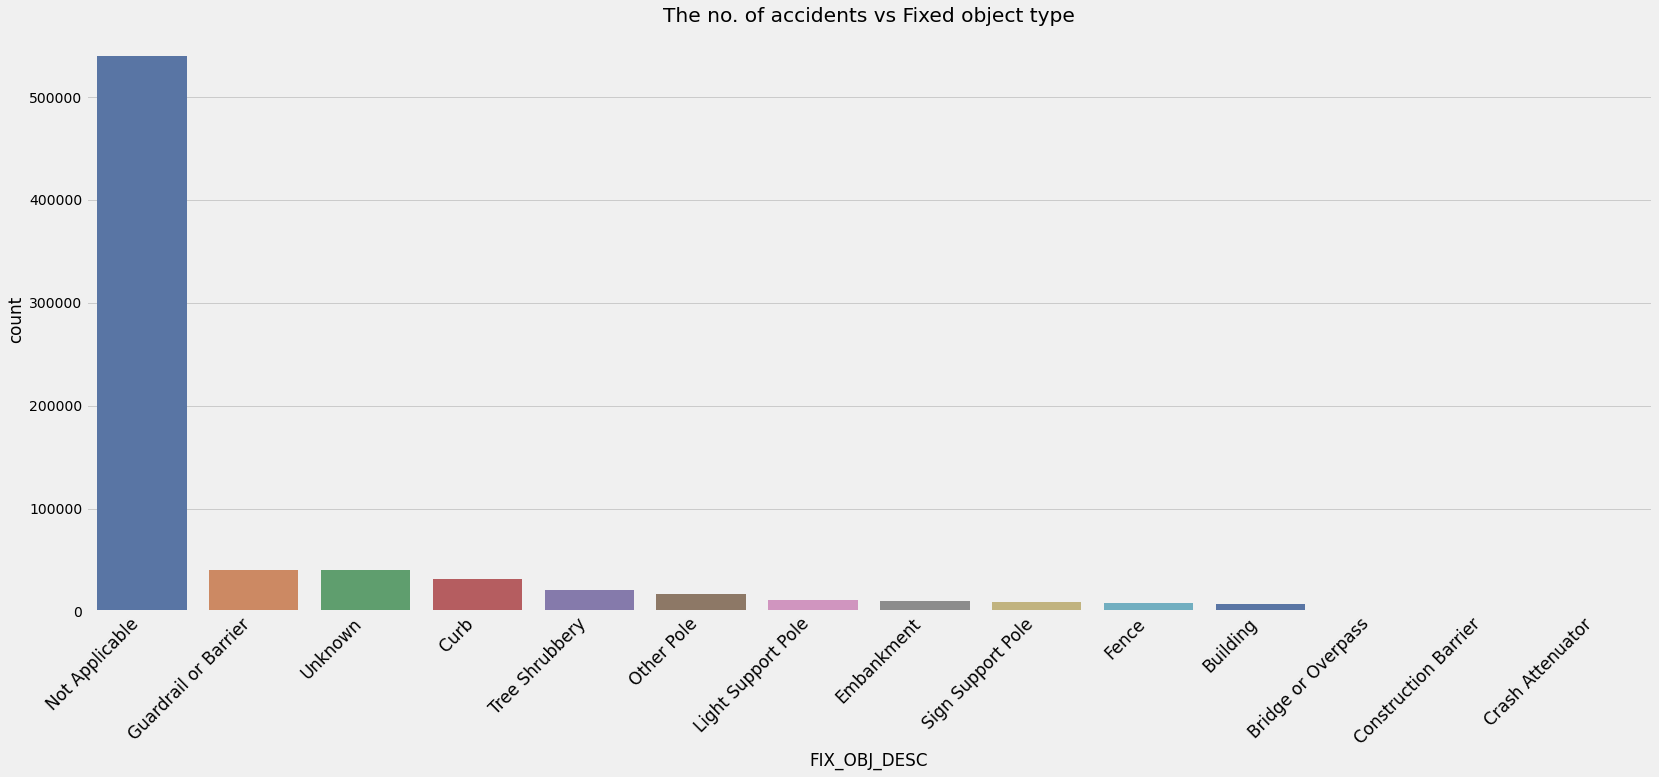

In [35]:
plt.rcParams['figure.figsize'] = (25, 10)
ax= sb.countplot(x='FIX_OBJ_DESC', data = df, palette = 'deep',order = df['FIX_OBJ_DESC'].value_counts().index)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('The no. of accidents vs Fixed object type')

In the above graph most of the accidents occured when there are no objects at the time if accident.

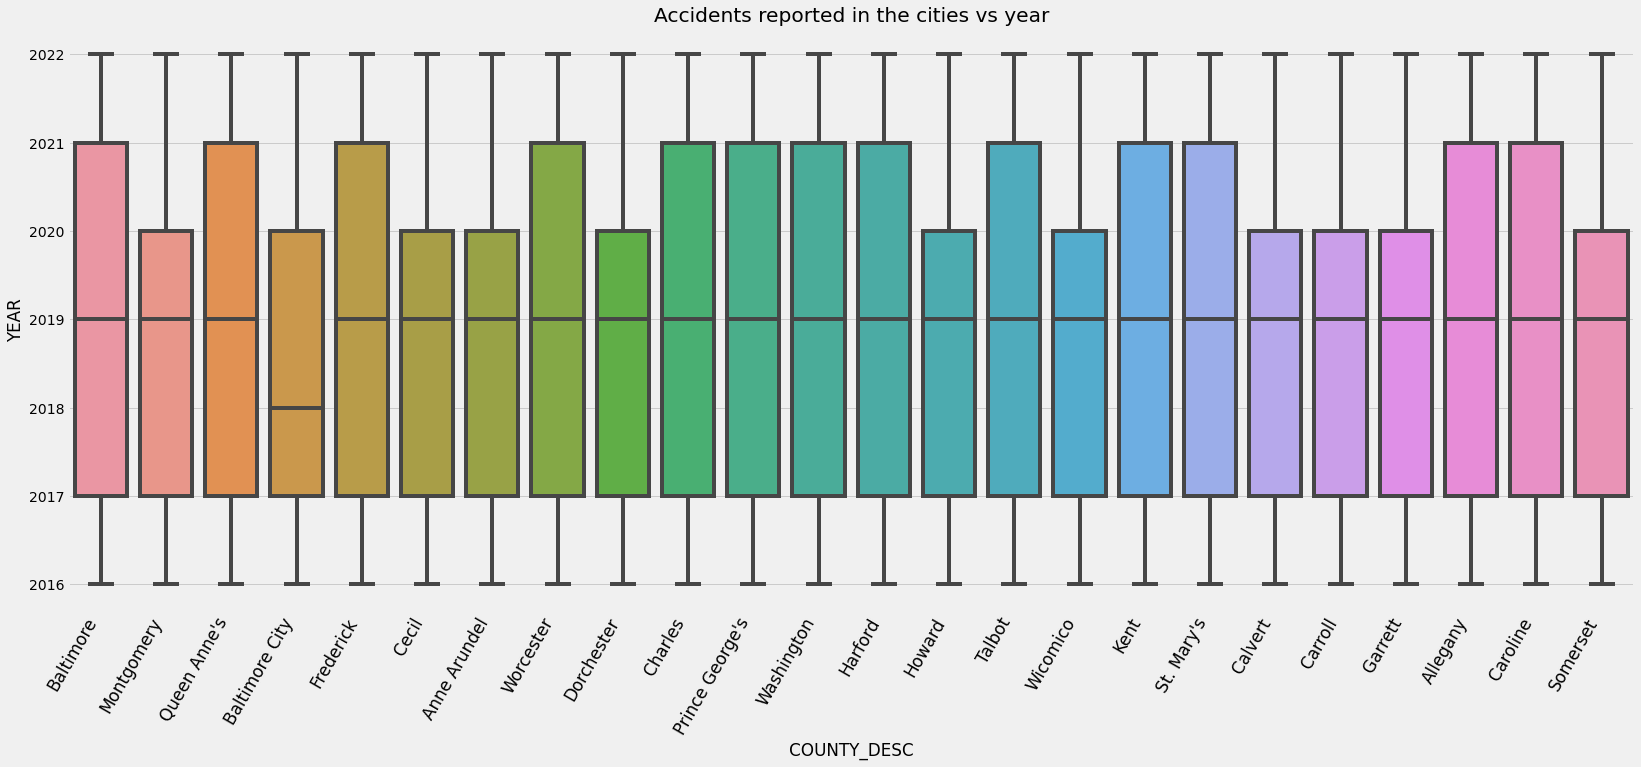

In [36]:
sb.boxplot(y = 'YEAR', x = 'COUNTY_DESC', data = df)
plt.xticks(
    rotation=60, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title("Accidents reported in the cities vs year")
plt.show()

Here is the boxplot for countywise with respect to year.

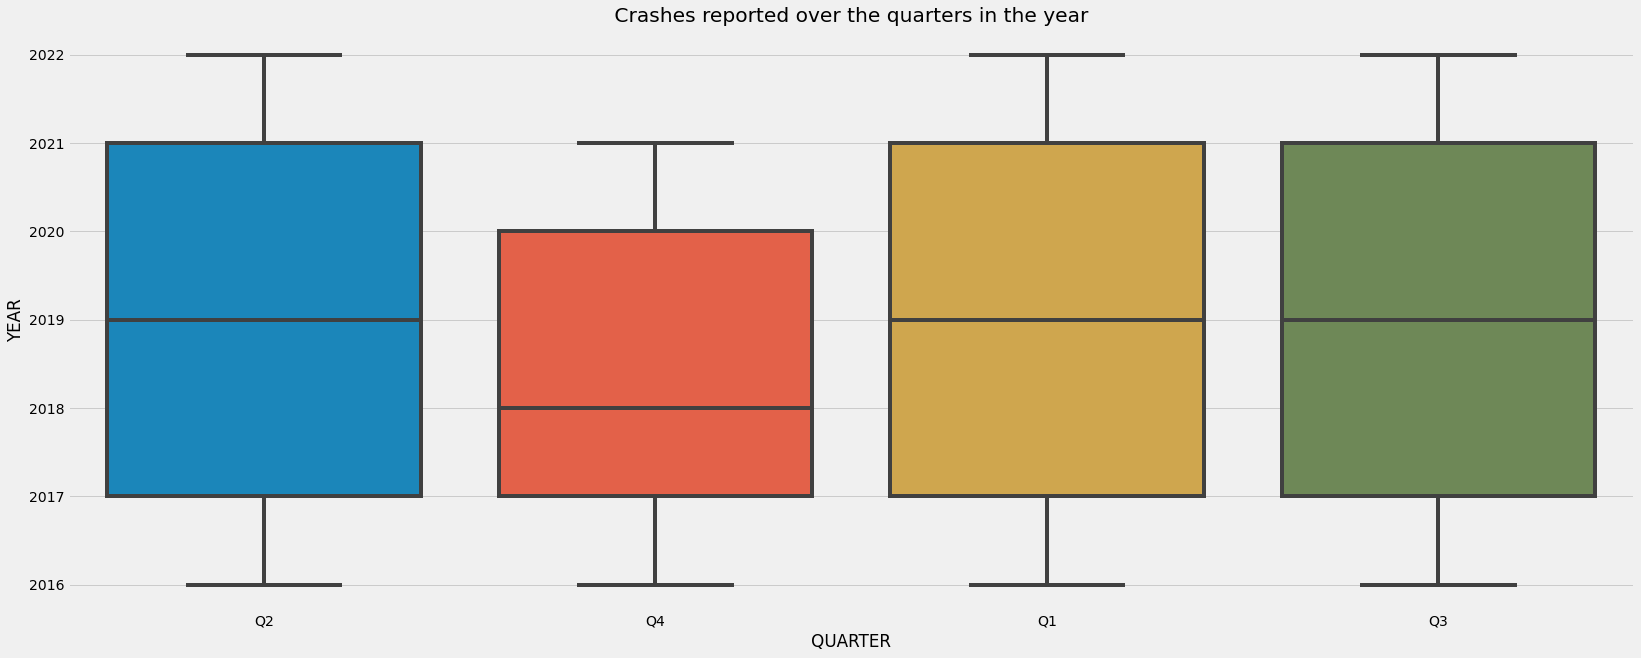

In [37]:
sb.boxplot(y = 'YEAR', x = 'QUARTER', data = df)
plt.title(" Crashes reported over the quarters in the year ")
plt.show()

Here is the boxplot for countywise with respect to Quarter.